# Health Data Exploration

Mood tracking via <a href="https://daylio.net/">Daylio app</a>, all other data exported from Apple Health to CSV using <a href="https://www.ericwolter.com/projects/apple-health-export/">Apple Health XML to CSV Converter</a> by Eric Wolter.

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
%matplotlib inline

In [66]:
mood_df = pd.read_csv('daylio_export_2022_01_12.csv')

In [67]:
# Drop unused columns
mood_df.drop(['note','note_title'], axis=1, inplace=True)

In [71]:
# Remove spaces
mood_df['activities'] = mood_df['activities'].str.replace(' ','')
mood_df['mood'] = mood_df['mood'].str.replace(' ','')
mood_df.head()

,full_date,date,weekday,time,mood,activities
0,1/11/2022,11-Jan,Tuesday,9:00 PM,okay,work|meditate
1,1/10/2022,10-Jan,Monday,9:00 PM,okay,exercise|work|meditate
2,1/9/2022,9-Jan,Sunday,9:00 PM,good,exercise
3,1/8/2022,8-Jan,Saturday,9:00 PM,good,exercise|meditate
4,1/7/2022,7-Jan,Friday,9:00 PM,good,work


In [72]:
# Split activites into a list
mood_df['activities'] = mood_df.activities.str.split('|')
mood_df.head()

,full_date,date,weekday,time,mood,activities
0,1/11/2022,11-Jan,Tuesday,9:00 PM,okay,"[work, meditate]"
1,1/10/2022,10-Jan,Monday,9:00 PM,okay,"[exercise, work, meditate]"
2,1/9/2022,9-Jan,Sunday,9:00 PM,good,[exercise]
3,1/8/2022,8-Jan,Saturday,9:00 PM,good,"[exercise, meditate]"
4,1/7/2022,7-Jan,Friday,9:00 PM,good,[work]


In [73]:
mood_df.dtypes

full_date     object
date          object
weekday       object
time          object
mood          object
activities    object
dtype: object

In [74]:
# activities_df = mood_df.copy()

#For every row in the dataframe, iterate through the list of activities and place a 1 into the corresponding column
for index, row in mood_df.iterrows():
    for activity in row['activities']:
        mood_df.at[index, activity] = 1
#Filling in the NaN values with 0 
mood_df = mood_df.fillna(0)
mood_df.head()

,full_date,date,weekday,time,mood,activities,work,meditate,exercise,period,gaming,family,pain,friends,sleepearly,relax,nature,reading
0,1/11/2022,11-Jan,Tuesday,9:00 PM,okay,"[work, meditate]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/10/2022,10-Jan,Monday,9:00 PM,okay,"[exercise, work, meditate]",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/9/2022,9-Jan,Sunday,9:00 PM,good,[exercise],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/8/2022,8-Jan,Saturday,9:00 PM,good,"[exercise, meditate]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/7/2022,7-Jan,Friday,9:00 PM,good,[work],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
mood_dict = {'great':5,'good':4,'okay':3,'depressed':2,'anxious':1}

In [81]:
# Convert mood to mood score
mood_df['mood_score']=mood_df['mood'].map(mood_dict)
mood_df.head()

,full_date,date,weekday,time,mood,activities,work,meditate,exercise,period,gaming,family,pain,friends,sleepearly,relax,nature,reading,mood_score
0,1/11/2022,11-Jan,Tuesday,9:00 PM,okay,"[work, meditate]",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,1/10/2022,10-Jan,Monday,9:00 PM,okay,"[exercise, work, meditate]",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,1/9/2022,9-Jan,Sunday,9:00 PM,good,[exercise],0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,1/8/2022,8-Jan,Saturday,9:00 PM,good,"[exercise, meditate]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,1/7/2022,7-Jan,Friday,9:00 PM,good,[work],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [82]:
mood_df.isnull().sum()

full_date     0
date          0
weekday       0
time          0
mood          0
activities    0
work          0
meditate      0
exercise      0
period        0
gaming        0
family        0
pain          0
friends       0
sleepearly    0
relax         0
nature        0
reading       0
mood_score    0
dtype: int64

In [88]:
mood_df = mood_df[::-1].reset_index()
mood_df.head()

,level_0,index,full_date,date,weekday,time,mood,activities,work,meditate,...,period,gaming,family,pain,friends,sleepearly,relax,nature,reading,mood_score
0,140,140,8/24/2021,24-Aug,Tuesday,7:00 PM,anxious,"[friends, exercise, reading, work, meditate]",1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,139,139,8/25/2021,1,Wednesday,8:20 PM,okay,"[date, exercise, reading, work, meditate]",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2,138,138,8/26/2021,26-Aug,Thursday,9:00 PM,good,"[exercise, work, meditate]",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,137,137,8/27/2021,27-Aug,Friday,9:00 PM,okay,"[work, pain]",1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
4,136,136,8/28/2021,28-Aug,Saturday,9:00 PM,okay,"[exercise, meditate]",0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


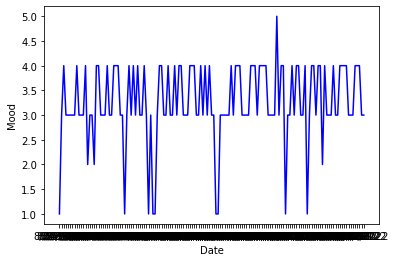

In [112]:
plt.plot(mood_df.full_date, mood_df.mood_score,  color='blue')
plt.xlabel("Date")
plt.ylabel("Mood")
plt.show()

In [154]:
X = np.asarray(mood_df[['work','meditate','exercise','pain']])

In [94]:
Y = np.asarray(mood_df[['mood_score']])

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [156]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [157]:
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.46069949 -0.11681952  0.17150388 -0.19536695]]


In [158]:
Y_hat = regr.predict(X_test)

In [159]:
print('Score: ', regr.score(X_test, Y_test))

Score:  0.21332506457211975


In [160]:
regr1 = linear_model.LinearRegression()
regr1.fit(X,Y)

LinearRegression()

In [161]:
print ('Coefficients: ', regr1.coef_)
print('Score: ', regr1.score(X, Y))

Coefficients:  [[-0.52843252 -0.03875175  0.09846153 -0.20012895]]
Score:  0.12292269621959229


In [120]:
mood_df.drop(['level_0','index'], axis=1, inplace=True)
mood_df.head()

,full_date,date,weekday,time,mood,activities,work,meditate,exercise,period,gaming,family,pain,friends,sleepearly,relax,nature,reading,mood_score
0,8/24/2021,24-Aug,Tuesday,7:00 PM,anxious,"[friends, exercise, reading, work, meditate]",1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,8/25/2021,1,Wednesday,8:20 PM,okay,"[date, exercise, reading, work, meditate]",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2,8/26/2021,26-Aug,Thursday,9:00 PM,good,"[exercise, work, meditate]",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,8/27/2021,27-Aug,Friday,9:00 PM,okay,"[work, pain]",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
4,8/28/2021,28-Aug,Saturday,9:00 PM,okay,"[exercise, meditate]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [130]:
weekday = mood_df.groupby('weekday')['mood_score'].mean().to_frame()

In [135]:
weekday = weekday.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='weekday')

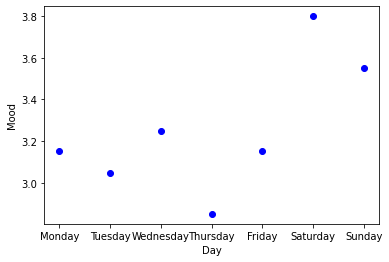

In [138]:
# Plot mood based on day of week
plt.plot(weekday.index, weekday.mood_score, 'bo')
plt.xlabel("Day")
plt.ylabel("Mood")
plt.show()

In [163]:
test = mood_df.groupby('period')['mood_score'].mean().to_frame()
test

,mood_score
period,
0.0,3.232759
1.0,3.360000
